In [ ]:
import pandas as pd
import numpy as np
import os

# from google.colab import drive
# drive.mount('/content/drive')

dataset = pd.read_csv("/content/styles.csv", on_bad_lines='skip')
print(dataset)
print(dataset.shape)
print(dataset.columns)

          id gender masterCategory subCategory            articleType  \
0      15970    Men        Apparel     Topwear                 Shirts   
1      39386    Men        Apparel  Bottomwear                  Jeans   
2      59263  Women    Accessories     Watches                Watches   
3      21379    Men        Apparel  Bottomwear            Track Pants   
4      53759    Men        Apparel     Topwear                Tshirts   
...      ...    ...            ...         ...                    ...   
44419  17036    Men       Footwear       Shoes           Casual Shoes   
44420   6461    Men       Footwear  Flip Flops             Flip Flops   
44421  18842    Men        Apparel     Topwear                Tshirts   
44422  46694  Women  Personal Care   Fragrance  Perfume and Body Mist   
44423  51623  Women    Accessories     Watches                Watches   

      baseColour  season    year   usage  \
0      Navy Blue    Fall  2011.0  Casual   
1           Blue  Summer  2012.0  C

In [ ]:
print(dataset.shape)

(44424, 10)


In [ ]:
import pandas as pd
import numpy as np
import os
import random

#Loading and reading the dataset
dataset_path = ("/content/styles.csv")
data = pd.read_csv(dataset_path, on_bad_lines='skip')
print(data.head())

      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track Pants  
4  2012.0  Casual                          Puma Men Grey T-shirt  


In [ ]:
#Keep only the necessary columns
column_to_keep = ['id' , 'gender' , 'masterCategory' , 'subCategory' , 'articleType' , 'baseColour' , 'season' , 'usage']
data = data[column_to_keep];
print(data.head())

#Clean the missing value
data.dropna(subset=['gender' ,'masterCategory' , 'baseColour'], inplace=True)

#Standardize data
data.columns = [col.strip().lower() for col in data.columns]

print("\nUnique values in gender: " , data['gender'].unique())
print("\n Unique values in seasons: " , data['season'].unique())
print("\n Unique values in usage: ", data['usage'].unique())



      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

    usage  
0  Casual  
1  Casual  
2  Casual  
3  Casual  
4  Casual  

Unique values in gender:  ['Men' 'Women' 'Boys' 'Girls' 'Unisex']

 Unique values in seasons:  ['Fall' 'Summer' 'Winter' 'Spring' nan]

 Unique values in usage:  ['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [ ]:
#Filter Column Values with only specific Values in gender , masterCategory and subCategory
mc = data['mastercategory'].unique()
sc = data['subcategory'].unique()
g = data['gender'].unique()
s = data['season'].unique()
u = data['usage'].unique()

print(mc , sc , g , u , sep="\n")

['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']
['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear' 'Wallets' 'Apparel Set' 'Headwear' 'Mufflers'
 'Skin Care' 'Makeup' 'Free Gifts' 'Ties' 'Accessories' 'Skin'
 'Beauty Accessories' 'Water Bottle' 'Eyes' 'Bath and Body' 'Gloves'
 'Sports Accessories' 'Cufflinks' 'Sports Equipment' 'Stoles' 'Hair'
 'Perfumes' 'Home Furnishing' 'Umbrellas' 'Wristbands' 'Vouchers']
['Men' 'Women' 'Boys' 'Girls' 'Unisex']
['Casual' 'Ethnic' 'Formal' 'Sports' nan 'Smart Casual' 'Travel' 'Party'
 'Home']


In [ ]:
#Filtering
data = data[data['gender'].isin(['Men' , 'Women'])]
data = data[data['mastercategory'].isin(['Apparel' , 'Footwear'])]
data = data[~data['subcategory'].isin(['Innerwear' , 'Loungewear and Nightwear'])]
data = data[~data['usage'].isin(['Home' , None])]

print(data['subcategory'].unique())
print(data['usage'].unique())

['Topwear' 'Bottomwear' 'Shoes' 'Flip Flops' 'Sandal' 'Saree' 'Dress'
 'Apparel Set']
['Casual' 'Ethnic' 'Formal' 'Sports' 'Smart Casual' nan 'Party' 'Travel']


In [ ]:
from PIL import Image
from PIL import ImageColor
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import HTML

#skin tone mapping based on hex color

skin_tones = {
    "#373028": "Deepest Skin",
    "#422811": "Very Deep",
    "#513B2E": "Deep Brown",
    "#6F503C": "Medium Brown",
    "#81654F": "Tan",
    "#9D7A54": "Light Tan",
    "#BEA07E": "Medium Fair",
    "#E5C8A6": "Light Fair",
    "#E7C1B8": "Warm Fair",
    "#F3DAD6": "Very Fair",
    "#FBF2F3": "Pale",
}

#Function to detect skin tone from image

def detect_skin_tone(image):
    # Ensure the image is in RGB
    if image.shape[2] == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Resize the face for consistent forehead cropping
    resized_image = cv2.resize(image, (224, 224))

    # Define forehead region (top center area of the face crop)
    h, w, _ = resized_image.shape
    forehead = resized_image[int(h * 0.1):int(h * 0.25), int(w * 0.3):int(w * 0.7)]

    # Calculate average RGB in the forehead region
    average_color = forehead.mean(axis=0).mean(axis=0)

    # Convert to hex
    avg_color_hex = "#{:02x}{:02x}{:02x}".format(
        int(average_color[0]), int(average_color[1]), int(average_color[2])
    )

    # Convert hex to RGB array for distance comparison
    avg_color_rgb = np.array(ImageColor.getrgb(avg_color_hex))

    # Find the closest match in your skin tone dictionary
    closest_tone_hex = min(
        skin_tones.keys(),
        key=lambda hex_code: np.linalg.norm(avg_color_rgb - np.array(ImageColor.getrgb(hex_code)))
    )

    return closest_tone_hex, skin_tones[closest_tone_hex]

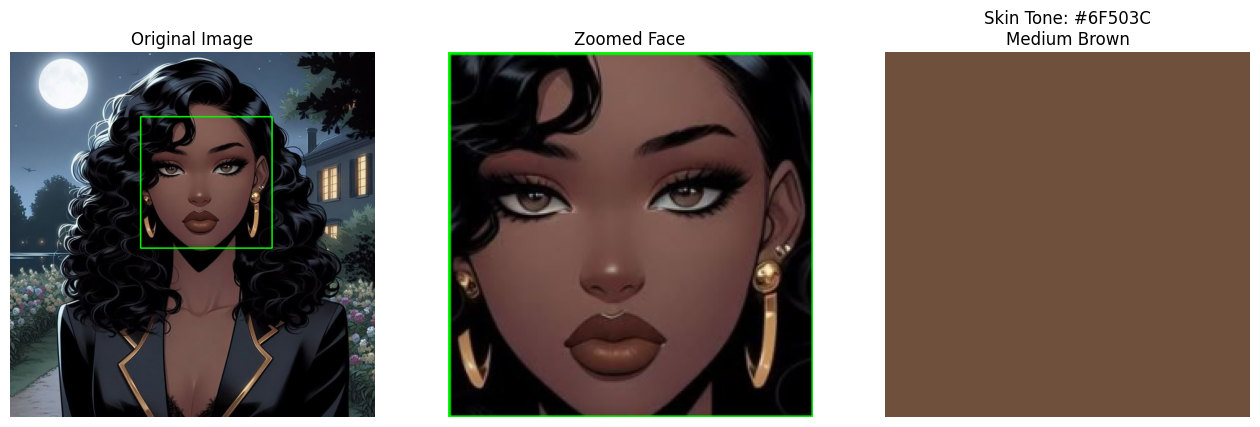

Detected Faces: 1


In [ ]:
# Function to display colored box
def display_box(face, width=200, height=100):
    display(HTML(f'<div style="width:{width}px; height:{height}px; background-color:{face[0]}; border: 2px solid black;">{face[1]}</div>'))

# display_box([detected_tone_hex,detected_tone_name] )

detected_tone_hex = ""

class FaceCropper(object):
    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    def generate(self, image_path, show_result=True):
        img = cv2.imread(image_path)
        if img is None:
            print("Image not found")
            return 0

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
        if len(faces) == 0:
            print("No face detected")
            return 0

        if show_result:
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        cropped_faces = []

        for (x, y, w, h) in faces:
            face_img = img[y:y + h, x:x + w]
            resized_face = cv2.resize(face_img, (224, 224))
            cropped_faces.append((resized_face, (x, y, w, h)))

        fig, ax = plt.subplots(1, 3, figsize=(16, 6))
        ax[0].imshow(img_rgb)
        ax[0].set_title('Original Image')
        ax[0].axis('off')

        if cropped_faces:
            zoomed_face, (x, y, w, h) = cropped_faces[0]
            zoomed_face_rgb = cv2.cvtColor(zoomed_face, cv2.COLOR_BGR2RGB)
            global detected_tone_hex

            ax[1].imshow(zoomed_face_rgb)
            ax[1].set_title('Zoomed Face')
            ax[1].axis('off')

            rect_x = int((zoomed_face.shape[0] - h) / 2)
            rect_y = int((zoomed_face.shape[1] - w) / 2)
            ax[1].add_patch(matplotlib.patches.Rectangle((rect_x, rect_y), w, h, fill=False, edgecolor='red', linewidth=2))

            # Skin tone detection from cropped face
            skin_tone, skin_color = detect_skin_tone(zoomed_face)
            detected_tone_hex = skin_tone

            # Tone swatch
            orange_block = np.ones((100, 100, 3))
            orange_rgb = matplotlib.colors.hex2color(skin_tone)
            orange_block *= orange_rgb

            ax[2].imshow(orange_block)
            ax[2].set_title(f'Skin Tone: {skin_tone}\n{skin_color}')
            ax[2].axis('off')

            plt.show()

        print(f"Detected Faces: {len(faces)}")

        i = 0
        for (x, y, w, h) in faces:
            face_img = img[y:y + h, x:x + w]
            last_img = cv2.resize(face_img, (32, 32))
            i += 1
            #cv2.imwrite(f"image{i}.jpg", last_img)



        return cropped_faces



# ✅ Usage (Outside the Class)
image_path = "/content/black.jpeg"
detector = FaceCropper()
cropped_faces = detector.generate(image_path, show_result=True)

In [ ]:
# Skin tone to color mapping
skin_tone_to_color_mapping = {
    "#373028": ["Navy Blue", "Black", "Charcoal", "Burgundy", "Maroon", "Olive", "Rust", "Gold", "Cream", "Peach"],
    "#422811": ["Navy Blue", "Brown", "Khaki", "Olive", "Maroon", "Mustard", "Teal", "Tan", "Rust", "Burgundy"],
    "#513B2E": ["Cream", "Beige", "Olive", "Burgundy", "Red", "Orange", "Mustard", "Bronze", "Teal", "Peach"],
    "#6F503C": ["Beige", "Brown", "Green", "Khaki", "Cream", "Peach", "Lime Green", "Olive", "Maroon", "Rust", "Mustard"],
    "#81654F": ["Beige", "Off White", "Sea Green", "Cream", "Lavender", "Mauve", "Burgundy", "Yellow", "Lime Green"],
    "#9D7A54": ["Olive", "Khaki", "Yellow", "Sea Green", "Turquoise Blue", "Coral", "White", "Gold", "Peach"],
    "#BEA07E": ["Coral", "Sea Green", "Turquoise Blue", "Pink", "Lavender", "Rose", "White", "Peach", "Teal", "Fluorescent Green"],
    "#E5C8A6": ["Turquoise Blue", "Peach", "Teal", "Pink", "Red", "Rose", "Off White", "White", "Cream", "Gold", "Yellow"],
    "#E7C1B8": ["Pink", "Rose", "Peach", "White", "Off White", "Beige", "Lavender", "Teal", "Fluorescent Green"],
    "#F3DAD6": ["White", "Cream", "Peach", "Pink", "Rose", "Lavender", "Mustard", "Lime Green", "Light Blue", "Fluorescent Green"],
    "#FBF2F3": ["Soft Pastels (Peach, Lavender, Pink)", "White", "Off White", "Rose", "Light Blue", "Sea Green", "Fluorescent Green", "Silver", "Cream", "Tan"]
}

# Get recommended colors for the detected skin tone
recommended_colors = skin_tone_to_color_mapping.get(detected_tone_hex,[])
print(f"Recommended Colors for {detected_tone_hex}: {recommended_colors}")

Recommended Colors for #6F503C: ['Beige', 'Brown', 'Green', 'Khaki', 'Cream', 'Peach', 'Lime Green', 'Olive', 'Maroon', 'Rust', 'Mustard']


In [ ]:
gender_filter = "Women"
user_usage = ["Casual"]
# Optional: Display swatches
def display_color_swatches(colors):
    html = ''.join([
        f"<div style='display:inline-block; width:100px; height:30px; background-color:{c.lower()}; border:1px solid #000; text-align:center; font-size:12px;'>{c}</div>"
        for c in colors
    ])
    display(HTML(html))

display_color_swatches(recommended_colors)

# ✅ Step 1: Filter the main dataset
filtered_data = data[
    (data['gender'] == gender_filter) &
    (data['basecolour'].isin(recommended_colors))
]

# ✅ Step 2: Divide into clothing categories
topwear = filtered_data[
    (filtered_data['subcategory'] == 'Topwear') &
    (filtered_data['usage'].isin(user_usage))
]

bottomwear = filtered_data[
    (filtered_data['subcategory'] == 'Bottomwear') &
    (filtered_data['usage'].isin(user_usage))
]

footwear = filtered_data[
    (filtered_data['mastercategory'] == 'Footwear')
]

# If formal event, narrow down footwear
if "Formal" in user_usage:
    footwear = footwear[footwear['subcategory'].isin(["Shoes"])]

print(f"\n🧵 Items after filtering:")
print(f"Topwear: {len(topwear)}, Bottomwear: {len(bottomwear)}, Footwear: {len(footwear)}")

# 🎯 Optional color harmony rules (basic for now)
def get_complementary(color, palette):
    return random.choice([c for c in palette if c != color])

def get_analogous(color, palette):
    return random.choice([c for c in palette if c != color])

def get_neutral(palette):
   neutrals = ["Black", "White", "Beige", "Cream", "Off White", "Grey", "Charcoal"]
   return random.choice([c for c in palette if c in neutrals])

# ✅ Step 3: Create outfit combinations
outfit_combinations = []

for top in topwear.head(10).itertuples():
    for bottom in bottomwear.head(50).itertuples():
        for foot in footwear.head(50).itertuples():
            bottom_color = get_complementary(top.basecolour, recommended_colors)
            footwear_color = random.choice([get_analogous(bottom_color, recommended_colors), get_neutral(recommended_colors)])

            outfit_combinations.append({
                "Topwear ID": top.id,
                "Bottomwear ID": bottom.id,
                "Footwear ID": foot.id,
                "Topwear Color": top.basecolour,
                "Bottomwear Color": bottom_color,
                "Footwear Color": footwear_color
            })

# ✅ Step 4: Display 5 outfit suggestions
print("\n🧥👖👟 Outfit Suggestions:")
for i, combo in enumerate(random.sample(outfit_combinations, min(5, len(outfit_combinations)))):
    print(f"\nOutfit {i + 1}:")
    print(f"👕 Topwear Color:   {combo['Topwear Color']}")
    print(f"👖 Bottomwear Color: {combo['Bottomwear Color']}")
    print(f"👟 Footwear Color:  {combo['Footwear Color']}")


🧵 Items after filtering:
Topwear: 474, Bottomwear: 99, Footwear: 547

🧥👖👟 Outfit Suggestions:

Outfit 1:
👕 Topwear Color:   Green
👖 Bottomwear Color: Peach
👟 Footwear Color:  Mustard

Outfit 2:
👕 Topwear Color:   Rust
👖 Bottomwear Color: Beige
👟 Footwear Color:  Olive

Outfit 3:
👕 Topwear Color:   Beige
👖 Bottomwear Color: Olive
👟 Footwear Color:  Mustard

Outfit 4:
👕 Topwear Color:   Cream
👖 Bottomwear Color: Maroon
👟 Footwear Color:  Cream

Outfit 5:
👕 Topwear Color:   Brown
👖 Bottomwear Color: Cream
👟 Footwear Color:  Mustard


In [ ]:
images_links = pd.read_csv("/content/images.csv", on_bad_lines='skip')
list(images_links[images_links['filename'] == "15972.jpg"].link)[0]

'http://assets.myntassets.com/v1/images/style/properties/8319e1f9610d0140b66bbd53afdc0d78_images.jpg'

In [ ]:
from IPython.display import display, HTML, Image

def display_combination_images(top_id, bottom_id, foot_id):
    top_img = list(images_links[images_links['filename'] == str(top_id) + ".jpg"].link)[0]
    bottom_img = list(images_links[images_links['filename'] == str(bottom_id) + ".jpg"].link)[0]
    foot_img = list(images_links[images_links['filename'] == str(foot_id) + ".jpg"].link)[0]


    # Create HTML layout to show images side by side
    html_code = f"""
    <div style="display: flex; justify-content: space-evenly; align-items: center;">
        <div style="text-align: center;">
            <h3>Topwear</h3>
            <img src="{top_img}" width="200px" />
        </div>
        <div style="text-align: center;">
            <h3>Bottomwear</h3>
            <img src="{bottom_img}" width="200px" />
        </div>
        <div style="text-align: center;">
            <h3>Footwear</h3>
            <img src="{foot_img}" width="200px" />
        </div>
    </div>
    """

    display(HTML(html_code))





# Example: Display the first combination
for i, combo in enumerate(random.sample(outfit_combinations, min(5, len(outfit_combinations)))):
    print(f"Outfit {i + 1}")
    display_combination_images(combo['Topwear ID'],combo['Bottomwear ID'],combo['Footwear ID'])


Outfit 1


Outfit 2


Outfit 3


Outfit 4


Outfit 5


In [ ]:
import cv2
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import random
import os
import webbrowser

# ----------- Load Datasets -----------
styles_df = pd.read_csv("styles.csv", on_bad_lines='skip')
images_df = pd.read_csv("images.csv", on_bad_lines='skip')

# ----------- Detect base color column -----------
print("📑 Columns in styles.csv:", styles_df.columns.tolist())
possible_basecolour_columns = ['basecolour', 'baseColor', 'baseColour']
basecolour = next((col for col in possible_basecolour_columns if col in styles_df.columns), None)
if basecolour is None:
    raise ValueError("⚠️ Could not find base color column in the dataset.")

# ----------- User Input -----------
image_path = input("📷 Enter the path to your face image: ").strip()
gender_input = input("🚻 Enter your gender (Men / Women): ").strip().capitalize()

if not os.path.exists(image_path):
    raise FileNotFoundError("❌ Image not found at specified path.")

if gender_input not in ['Men', 'Women']:
    raise ValueError("❌ Please enter a valid gender: Men or Women only")

# ----------- Detect Face and Crop -----------
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
img = cv2.imread(image_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.1, 4)

if len(faces) == 0:
    print("😢 No face detected.")
    exit()

x, y, w, h = faces[0]
face_img = img[y:y+h, x:x+w]
face_rgb = cv2.cvtColor(face_img, cv2.COLOR_BGR2RGB)
resized_face = cv2.resize(face_rgb, (100, 100))

# ----------- Detect Dominant Skin Tone -----------
pixels = resized_face.reshape((-1, 3))
kmeans = KMeans(n_clusters=3, random_state=42).fit(pixels)
dominant = kmeans.cluster_centers_[0].astype(int)
hex_color = "#{:02x}{:02x}{:02x}".format(*dominant)
print(f"✅ Detected Skin Tone (hex): {hex_color}")

# ----------- Skin Tone to Recommended Colors -----------
skin_tone_to_color_mapping = {
    "#373028": ["Navy Blue", "Black", "Charcoal", "Burgundy", "Olive"],
    "#E5C8A6": ["Teal", "Pink", "Red", "Cream", "Gold"],
    "#FBF2F3": ["Pastels", "White", "Lavender", "Light Blue"],
    "#BEA07E": ["Sea Green", "Turquoise", "Peach", "Rose", "White"],
    "#81654F": ["Beige", "Off White", "Sea Green", "Cream"]
}

def closest_hex(hex_code, candidates):
    def hex_dist(h1, h2):
        return sum((int(h1[i:i+2], 16) - int(h2[i:i+2], 16)) ** 2 for i in (1, 3, 5))
    return min(candidates, key=lambda h: hex_dist(hex_code, h))

available_hexes = [h for h in skin_tone_to_color_mapping.keys() if h.startswith("#")]
closest_match = closest_hex(hex_color, available_hexes)
recommended_colors = skin_tone_to_color_mapping.get(closest_match, ["Black", "White", "Beige", "Cream"])
print(f"🎨 Recommended Clothing Colors: {recommended_colors}")

# ----------- Filter Dataset Using Gender & Usage -----------
usage_filter = ["Casual"]

filtered = styles_df[
    (styles_df['gender'] == gender_input) &
    (styles_df[basecolour].isin(recommended_colors)) &
    (styles_df['usage'].isin(usage_filter))
]

topwear = filtered[filtered['subCategory'] == 'Topwear']
bottomwear = filtered[filtered['subCategory'] == 'Bottomwear']
footwear = filtered[filtered['masterCategory'] == 'Footwear']

# ----------- Color Harmony Utilities -----------
def get_harmonious(color, palette):
    candidates = [c for c in palette if c != color]
    return random.choice(candidates) if candidates else color

def get_neutral(palette):
    neutrals = ["Black", "White", "Beige", "Cream", "Off White", "Grey"]
    return random.choice([c for c in palette if c in neutrals]) or "Black"

# ----------- Smart Outfit Selection -----------
outfits = []

top_candidates = topwear.sample(min(5, len(topwear)))
for top in top_candidates.itertuples():
    bottom_color = get_harmonious(getattr(top, basecolour), recommended_colors)
    bottom_match = bottomwear[bottomwear[basecolour] == bottom_color]
    if bottom_match.empty:
        continue

    bottom = bottom_match.sample(1).iloc[0]

    foot_color = get_neutral(recommended_colors)
    foot_match = footwear[footwear[basecolour] == foot_color]
    if foot_match.empty:
        continue

    foot = foot_match.sample(1).iloc[0]

    outfits.append({
        "Topwear ID": top.id,
        "Top Color": getattr(top, basecolour),
        "Bottomwear ID": bottom['id'],
        "Bottom Color": bottom[basecolour],
        "Footwear ID": foot['id'],
        "Footwear Color": foot[basecolour]
    })

# ----------- Image Helper -----------
def get_image_link(item_id):
    fname = f"{item_id}.jpg"
    match = images_df[images_df['filename'] == fname]
    if not match.empty:
        return match.iloc[0]['link']
    return None

# ----------- Show Final Outfits -----------
print("\n👗 Recommended Outfits Based on Your Skin Tone and Style:")
if not outfits:
    print("No matching outfits found. Try changing your filters or dataset.")
else:
    for i, outfit in enumerate(outfits):
        print(f"\n🧥 Outfit {i + 1}")
        print(f"👚 Topwear Color:     {outfit['Top Color']} (ID: {outfit['Topwear ID']})")
        print(f"👖 Bottomwear Color:  {outfit['Bottom Color']} (ID: {outfit['Bottomwear ID']})")
        print(f"👟 Footwear Color:    {outfit['Footwear Color']} (ID: {outfit['Footwear ID']})")

        # Show image links
        top_img = get_image_link(outfit['Topwear ID'])
        bottom_img = get_image_link(outfit['Bottomwear ID'])
        foot_img = get_image_link(outfit['Footwear ID'])

        print("🖼️ Image Links:")
        print(f"   👚 Topwear:    {top_img or 'Not found'}")
        print(f"   👖 Bottomwear: {bottom_img or 'Not found'}")
        print(f"   👟 Footwear:   {foot_img or 'Not found'}")

        open_browser = input("🌐 Open these images in browser? (y/n): ").lower().strip()
        if open_browser == 'y':
            for url in [top_img, bottom_img, foot_img]:
                if url:
                    webbrowser.open(url)

📑 Columns in styles.csv: ['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName']
📷 Enter the path to your face image: /content/black.jpeg
🚻 Enter your gender (Men / Women): Women
✅ Detected Skin Tone (hex): #79564e
🎨 Recommended Clothing Colors: ['Beige', 'Off White', 'Sea Green', 'Cream']

👗 Recommended Outfits Based on Your Skin Tone and Style:

🧥 Outfit 1
👚 Topwear Color:     Off White (ID: 40394)
👖 Bottomwear Color:  Cream (ID: 57893)
👟 Footwear Color:    Off White (ID: 17489)
🖼️ Image Links:
   👚 Topwear:    http://assets.myntassets.com/v1/images/style/properties/48467218a936de41f04100e84a99f6fb_images.jpg
   👖 Bottomwear: http://assets.myntassets.com/v1/images/style/properties/Femella-Women-Cream-Leggings_ae4a4c58f4e4ec093393e29b48710929_images.jpg
   👟 Footwear:   http://assets.myntassets.com/v1/image/style/properties/17489/Rockport-Women-Casual-Off-White-Flats_1_32c908f3d211f8df31f35d1e87ebaf63.jpg
🌐 Open t